In [1]:
import pandas
import seaborn as sns
import fastdm

In [2]:
df = pandas.load('/Users/Gilles/Dropbox/Science/tdcs/data/all_data.pandas')
df.RT = df.RT.astype(float) / 1000.
df.subj_idx = df.id.map(lambda x: x.split('.')[0])

/usr/local/lib/python2.7/site-packages/pandas/core/common.py:3180: FutureWarning: load is deprecated, use read_pickle
  warnings.warn("load is deprecated, use read_pickle", FutureWarning)


In [ ]:
df = 

In [6]:
print df.shape
df = df[df.RT > .25]
print df.shape
df['response'] = df.accuracy
fitter = fastdm.FastDM(df,
                       depends_on={'t0':['acc_spd', 'tdcs'],
                                   'v':['acc_spd', 'tdcs'],
                                   'a':['acc_spd', 'tdcs'],
                                   'st0':['acc_spd', 'tdcs'],
                                   'szr':['acc_spd', 'tdcs'],
                                   'sv':['acc_spd', 'tdcs'],                                   
})

(52800, 12)
(52287, 12)


In [8]:
r = fitter.fit()

Running fast-dm on experiment_S1.ctl
Running fast-dm on experiment_S15.ctl
Running fast-dm on experiment_S12.ctl
Running fast-dm on experiment_S4.ctl
Running fast-dm on experiment_S10.ctlRunning fast-dm on experiment_S2.ctlRunning fast-dm on experiment_S13.ctlRunning fast-dm on experiment_S5.ctl



Running fast-dm on experiment_S11.ctlRunning fast-dm on experiment_S3.ctlRunning fast-dm on experiment_S14.ctlRunning fast-dm on experiment_S6.ctl



Running fast-dm on experiment_A13.ctlRunning fast-dm on experiment_A10.ctlRunning fast-dm on experiment_A16.ctlRunning fast-dm on experiment_S7.ctl



Running fast-dm on experiment_A14.ctlRunning fast-dm on experiment_A11.ctlRunning fast-dm on experiment_A17.ctlRunning fast-dm on experiment_S8.ctl



Running fast-dm on experiment_A15.ctlRunning fast-dm on experiment_A12.ctlRunning fast-dm on experiment_A2.ctlRunning fast-dm on experiment_S9.ctl



Running fast-dm on experiment_L1.ctlRunning fast-dm on experiment_A6.ctlRunning fast-dm on experim

In [9]:
r = fitter.get_parameters()

/usr/local/lib/python2.7/site-packages/pandas/io/parsers.py:639: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  ParserWarning)


In [17]:
import pickle as pkl

In [19]:
pkl.dump(r, open('/Users/Gilles/Dropbox/Science/tdcs/data/fitted_params_fastdm.pkl', 'w'))

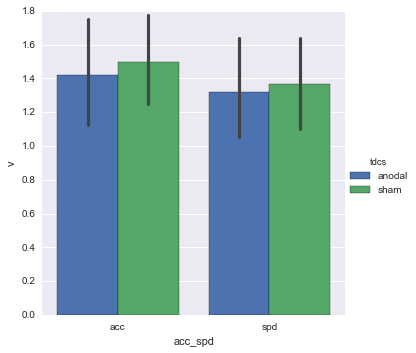

In [21]:
sns.factorplot('acc_spd', 'v', 'tdcs', r.melted_parameters('v'))

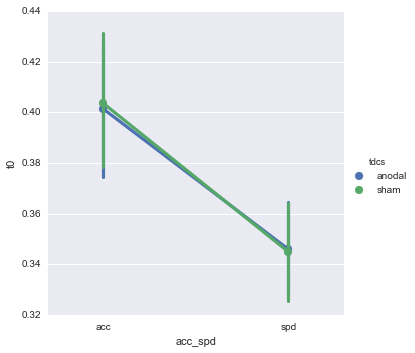

In [23]:
sns.factorplot('acc_spd', 't0', 'tdcs', r.melted_parameters('t0'))

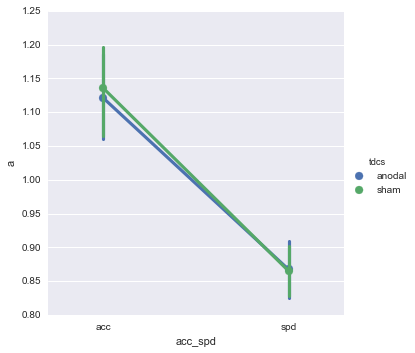

In [24]:
sns.factorplot('acc_spd', 'a', 'tdcs', r.melted_parameters('a'))

In [25]:
import hddm

Couldn't import dot_parser, loading of dot files will not be possible.


In [30]:
df['rt'] = df['RT']

In [32]:
model = hddm.HDDM(df[df.dataset == 'berkeley'], depends_on={'t':['acc_spd', 'tdcs'],
                                                    'v':['acc_spd', 'tdcs'],
                                                    'a':['acc_spd', 'tdcs']})

In [33]:
model.sample(1000)

 [-----------------100%-----------------] 1000 of 1000 complete in 132.8 sec

Plotting a(acc.anodal)
Plotting a(acc.sham)
Plotting a(spd.anodal)
Plotting a(spd.sham)
Plotting a_std
Plotting v(acc.anodal)
Plotting v(acc.sham)
Plotting v(spd.anodal)
Plotting v(spd.sham)
Plotting v_std
Plotting t(acc.anodal)
Plotting t(acc.sham)
Plotting t(spd.anodal)
Plotting t(spd.sham)
Plotting t_std


/usr/local/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2499: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


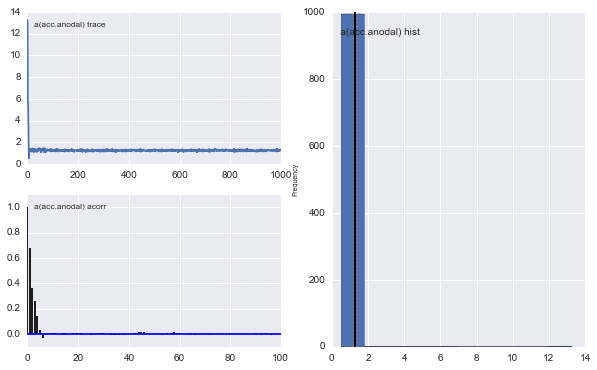

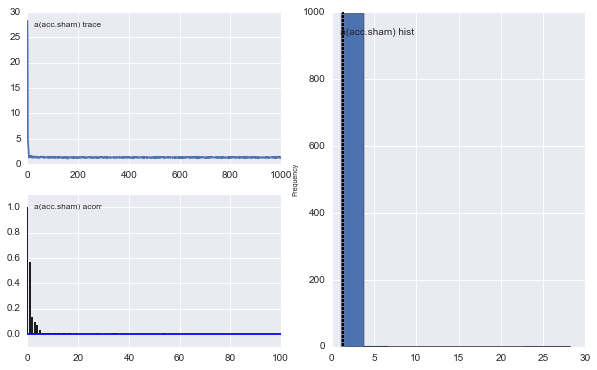

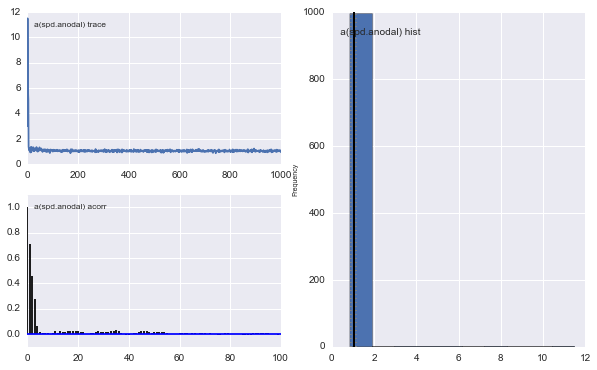

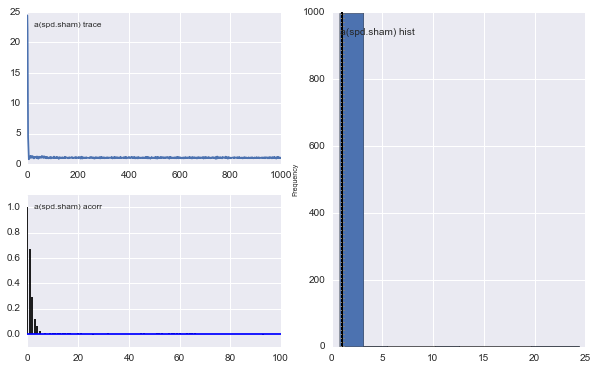

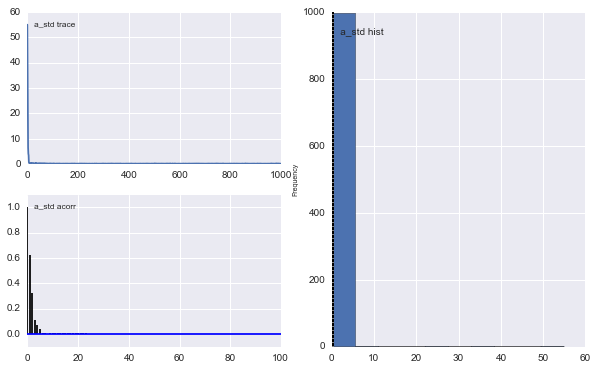

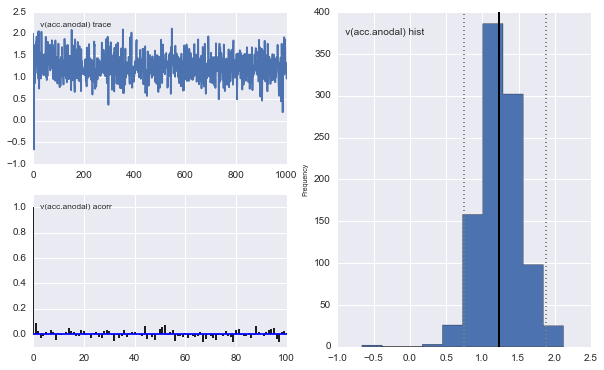

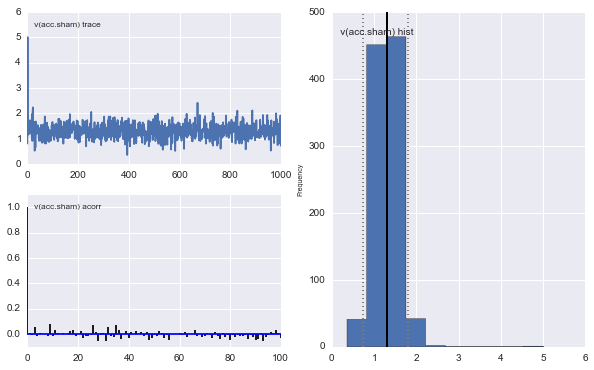

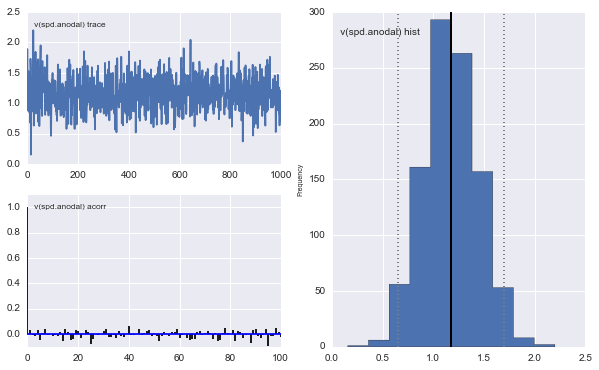

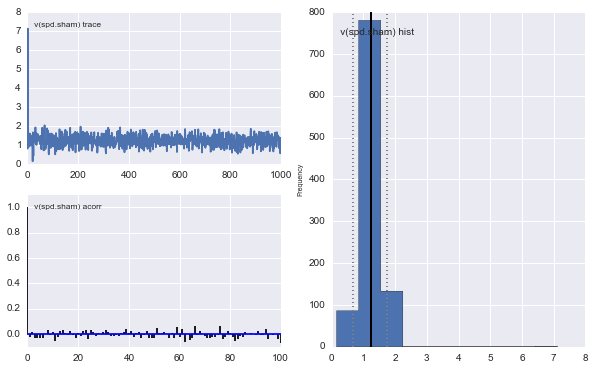

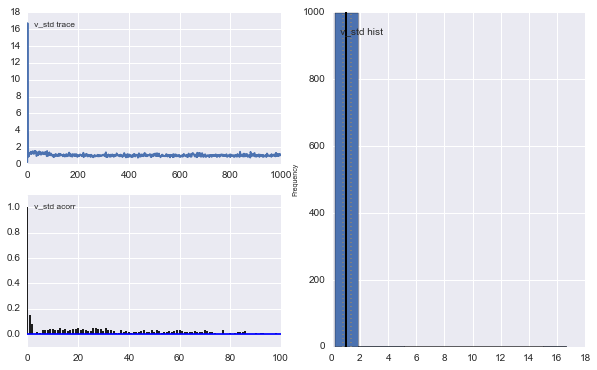

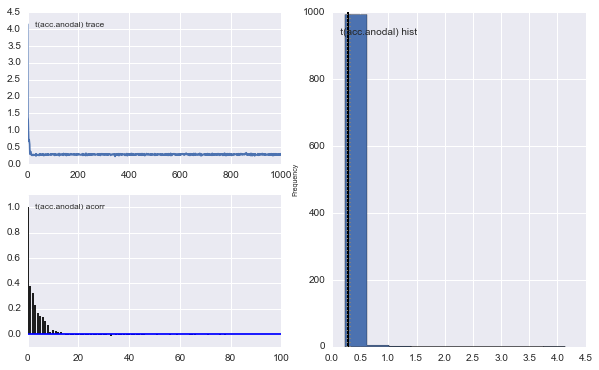

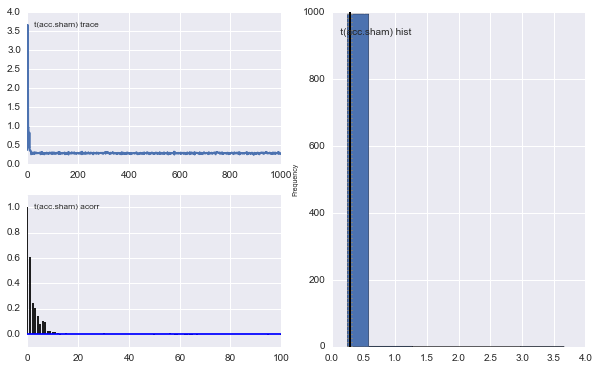

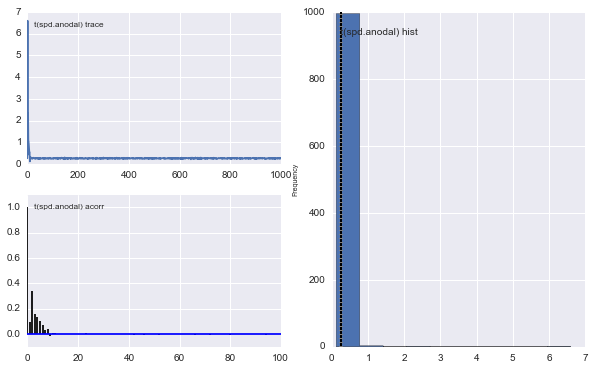

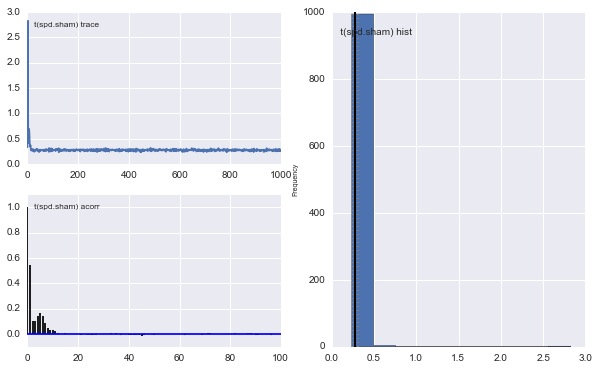

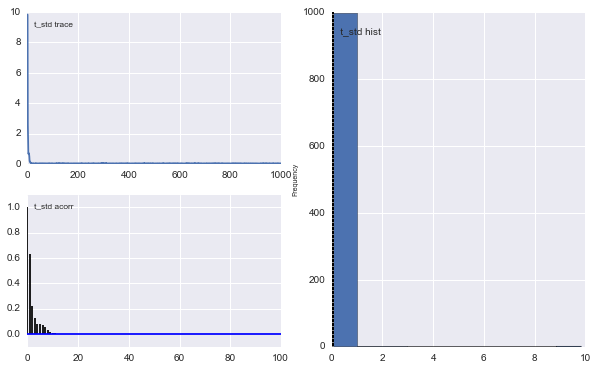

In [34]:
model.plot_posteriors()

In [35]:
import seaborn as sns

<pymc.distributions.Gamma 'a(acc.anodal)' at 0x1172ee410>

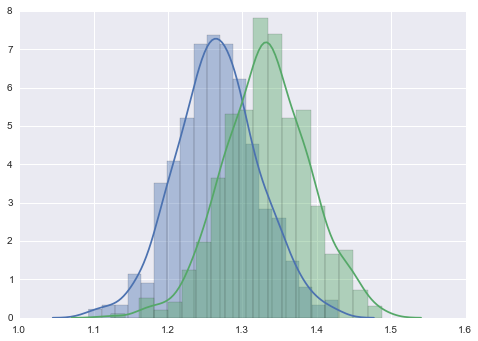

In [46]:
sns.distplot(model.nodes_db.ix['a(acc.anodal)', 'node'].trace[500:])
sns.distplot(model.nodes_db.ix['a(acc.sham)', 'node'].trace[500:])

In [3]:
df.dataset.unique()

array(['berkeley', 'amsterdam', 'leiden'], dtype=object)

In [5]:
print df.shape
df = df[df.RT > .25]
print df.shape
df['response'] = df.accuracy
fitter = fastdm.FastDM(df[df.dataset=='berkeley'],
                       depends_on={'a':['acc_spd', 'tdcs'],})

(52800, 12)
(52287, 12)


In [6]:
r2 = fitter.fit()

Running fast-dm on experiment_S10.ctl
Running fast-dm on experiment_S1.ctl
Running fast-dm on experiment_S11.ctl
Running fast-dm on experiment_S12.ctl
Running fast-dm on experiment_S3.ctlRunning fast-dm on experiment_S13.ctlRunning fast-dm on experiment_S15.ctlRunning fast-dm on experiment_S14.ctl



Running fast-dm on experiment_S5.ctlRunning fast-dm on experiment_S2.ctlRunning fast-dm on experiment_S4.ctl


Running fast-dm on experiment_S7.ctlRunning fast-dm on experiment_S6.ctlRunning fast-dm on experiment_S8.ctl


Running fast-dm on experiment_S9.ctl


In [1]:
params = fitter.get_parameters()

NameError: name 'fitter' is not defined

In [11]:
df_par = params.melted_parameters('a')
df_par.head()

,subj_idx,a,acc_spd,tdcs
0,S1,0.8779,acc,anodal
1,S10,1.0974,acc,anodal
2,S11,0.8805,acc,anodal
3,S12,1.5085,acc,anodal
4,S13,1.5784,acc,anodal


In [13]:
df_par['dataset'] = df_par.subj_idx.map(lambda x: x[0])
df_par['dataset'] = df_par.dataset.map({'S':'berkeley',
                                        'A':'amsterdam',
                                        'L':'leiden'})


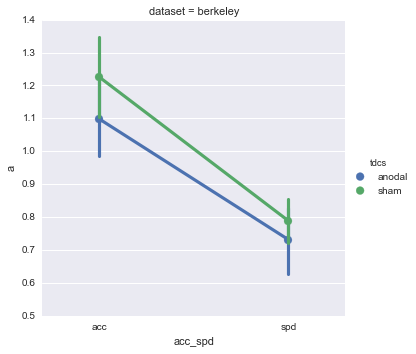

In [16]:
sns.factorplot('acc_spd','a','tdcs', df_par[df_par.subj_idx != 'S1'], col='dataset',
               col_order=['berkeley'])

In [17]:
dfp = df_par.pivot_table(index='subj_idx', columns=['acc_spd', 'tdcs'])

In [18]:
import scipy as sp
from scipy import stats

sp.stats.ttest_rel(dfp['a', 'acc', 'anodal'], dfp['a', 'acc', 'sham'], )

(-2.099505630969309, 0.05438286048385825)

In [20]:
%load_ext rpy2.ipython

Error in library(vimcom) : there is no package called ‘vimcom’


In [19]:
%%R -i df_par

library("BayesFactor")
print(summary(aov(a ~ acc_spd*tdcs  + Error(subj_idx), data=df_par)))

bf = anovaBF(a ~ acc_spd*tdcs , data=df_par, whichRandom="subj_idx", whichModels='all')

print(bf)

print(bf[1] / bf[3])

ERROR: Cell magic `%%R` not found.


In [1]:
import pickle as pkl

In [3]:
r = pkl.load(open('/Users/Gilles/Dropbox/Science/tdcs/data/fitted_params_fastdm.pkl'))

In [7]:
r.depends_on

OrderedDict([('a', ['acc_spd', 'tdcs']), ('sv', ['acc_spd', 'tdcs']), ('t0', ['acc_spd', 'tdcs']), ('st0', ['acc_spd', 'tdcs']), ('v', ['acc_spd', 'tdcs']), ('szr', ['acc_spd', 'tdcs'])])

In [8]:
r.dataframe

,RT,acc_spd,accuracy,angle,block,coherence,dataset,id,left_right,subj_idx,tdcs,trial_NR,response
0,0.799,spd,1,180,1,0.4171,berkeley,S1.1,2,S1,sham,1,1
1,0.613,spd,1,180,1,0.4171,berkeley,S1.1,2,S1,sham,2,1
2,0.627,spd,1,180,1,0.4171,berkeley,S1.1,1,S1,sham,3,1
3,1.280,acc,0,180,1,0.4171,berkeley,S1.1,1,S1,sham,4,0
4,0.800,spd,1,180,1,0.4171,berkeley,S1.1,2,S1,sham,5,1
5,0.760,acc,1,180,1,0.4171,berkeley,S1.1,2,S1,sham,6,1
6,0.719,acc,0,180,1,0.4171,berkeley,S1.1,1,S1,sham,7,0
7,0.799,spd,0,180,1,0.4171,berkeley,S1.1,1,S1,sham,8,0
8,0.520,spd,1,180,1,0.4171,berkeley,S1.1,1,S1,sham,9,1
9,1.066,acc,1,180,1,0.4171,berkeley,S1.1,1,S1,sham,10,1


In [6]:
r.parameters

,a_acc_anodal,a_acc_sham,a_spd_anodal,a_spd_sham,d,fit,method,penalty,st0_acc_anodal,st0_acc_sham,...,t0_acc_anodal,t0_acc_sham,t0_spd_anodal,t0_spd_sham,time,v_acc_anodal,v_acc_sham,v_spd_anodal,v_spd_sham,subj_idx
subj_idx,,,,,,,,,,,,,,,,,,,,,
S1,1.1570,1.2734,1.1920,1.0734,-0.0080,0.0278,KS,0,0.0825,0.1020,...,0.3588,0.4214,0.3363,0.4203,27.9566,5.8450,4.8769,5.9620,4.7237,S1
S10,1.1559,1.4912,1.0593,1.0862,0.0037,0.1161,KS,0,0.4124,0.3815,...,0.5256,0.5474,0.4379,0.3868,53.8758,0.7161,1.5340,0.9676,1.5182,S10
S11,0.9402,1.1411,0.8193,0.8746,-0.0038,0.5054,KS,0,0.0973,0.1679,...,0.4323,0.4546,0.4167,0.4426,59.3516,1.4738,1.5640,1.4984,1.3963,S11
S12,1.1644,1.2625,0.7551,0.7231,-0.0189,0.2812,KS,0,0.3293,0.4247,...,0.4534,0.3671,0.2682,0.2816,48.4283,1.6359,1.6179,0.7596,1.3939,S12
S13,1.2822,1.3018,0.9128,0.7893,0.0113,0.5220,KS,0,0.4041,0.2857,...,0.5022,0.4723,0.3186,0.3268,54.5188,0.8215,0.7438,0.7576,0.8379,S13
S14,1.3203,1.3143,0.6716,0.7910,-0.0050,0.0321,KS,0,0.0314,0.0823,...,0.2567,0.2470,0.3062,0.3033,61.7425,1.4710,1.5628,2.0152,1.5704,S14
S15,0.9257,1.2379,0.6181,0.8219,0.0090,0.0062,KS,0,0.2949,0.2684,...,0.4595,0.4619,0.3529,0.3260,48.4532,1.1373,1.6637,1.4231,2.3016,S15
S2,1.0707,0.8413,1.0092,0.7757,-0.0091,0.5521,KS,0,0.1060,0.1370,...,0.3885,0.3734,0.3991,0.3643,47.0215,1.5663,1.6357,1.6215,1.2222,S2
S3,0.8090,1.0835,0.8768,0.8585,-0.0062,0.1970,KS,0,0.2019,0.2040,...,0.2742,0.2902,0.2476,0.2798,37.2758,2.2142,1.4118,2.3066,1.4271,S3
